In [1]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pylab as plt

# 1. IMG READ

In [2]:
img = cv2.imread('img/sample1.png')

# 2. IMG CROP

In [3]:
x_length = int(img.shape[1])
half = int(img.shape[0]/2)

In [4]:
cropped_img = img[0:half,0+int(x_length/5):x_length-int(x_length/5)]

# 3. RGB NOMALIZATION

In [5]:
img = cropped_img

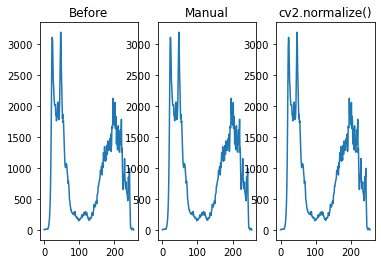

In [6]:
img = cv2.imread('./img/sample2.png', cv2.IMREAD_REDUCED_COLOR_2)
#--② 직접 연산한 정규화
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

#--③ OpenCV API를 이용한 정규화
img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

#--④ 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

hists = {'Before' : hist, 'Manual':hist_norm, 'cv2.normalize()':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

In [7]:
cv2.imshow('Before', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
>>> cv2.imshow('image', cropped_img)
>>> cv2.waitKey(0)
>>> cv2.destroyAllWindows()